## Hackathon BBVA 2022
## Equipo A++
# Reto PYME: Modelo en Diagrama de Voronoi

In [1]:
import numpy as np
import pandas as pd
import scipy.spatial as spatial
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.path as path
import matplotlib as mpl
import smopy
from unidecode import unidecode
from shapely.ops import cascaded_union
from geovoronoi.plotting import subplot_for_map , plot_voronoi_polys_with_points_in_area
from geovoronoi import voronoi_regions_from_coords, points_to_coords
%matplotlib inline

In [2]:
coor = pd.read_csv('coordenadas.csv',index_col=0)
df = pd.read_csv('Final_Data_Hackathon_2022.csv')

In [3]:
dfred = df.head(len(coor))

In [4]:
dfred['DirComp'] = (dfred['Direccion1'].fillna('') + ' ' + dfred['Direccion2'].fillna('') + ' ' + dfred['Direccion3'].fillna('') + ' ' + dfred['Colonia'].fillna('') + ' ' + dfred['MunicipioDel'].fillna('') + ' ' + dfred['CP'].astype(str).fillna('') + ' ' + dfred['Estado'].fillna(''))
df2 = dfred[['Index','NombComp','DirComp','Estado']]

<ipython-input-4-8a4b0b23426e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfred['DirComp'] = (dfred['Direccion1'].fillna('') + ' ' + dfred['Direccion2'].fillna('') + ' ' + dfred['Direccion3'].fillna('') + ' ' + dfred['Colonia'].fillna('') + ' ' + dfred['MunicipioDel'].fillna('') + ' ' + dfred['CP'].astype(str).fillna('') + ' ' + dfred['Estado'].fillna(''))


In [5]:
df2['Lat'] = coor['lat']
df2['Lon'] = coor['log']

<ipython-input-5-164164b728bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Lat'] = coor['lat']
<ipython-input-5-164164b728bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Lon'] = coor['log']


In [6]:
df2=df2.dropna().reset_index(drop=True)
df2

,Index,NombComp,DirComp,Estado,Lat,Lon
0,0,CENTRO PAPELERO SUN-RISE SA DE CV,REGINA 135 ACCE A CENTRO #AREA 9# CUAUHTEMOC 6...,CDMX,19.427110,-99.128779
1,1,ECOTRANSPORTES ZERMENO GARCIA SA DE CV,VALPARAISO 65 1 TEPEYAC INSURGENTES GUSTAVO A ...,CDMX,31.655583,-106.342304
2,2,"TECNOLAMINAS, SA DE CV",CALLE DEL RIO 2 INDUSTRIAL ALCE BLAN NAUCALPA...,Estado de Mexico,10.480590,-66.534729
3,3,MASVIDA SA CV,HAMBURGO 141 03A JUAREZ CUAUHTEMOC 6600 CDMX,CDMX,42.938343,-85.684659
4,4,INTEGRADORA COMERCIAL VS SA DE CV,PEDRO GUZMAN 17 TORRE 8 DEP 604 LOMAS DE SAN L...,Estado de Mexico,19.548678,-99.230002
...,...,...,...,...,...,...
969,1028,"PAOLIZER, SA DE CV",CDA ACAYUCAN MZA 360 LT 3352 LAZARO CARDENAS T...,Estado de Mexico,19.534464,-99.118502
970,1029,IMPRENTA NEXO GRAFICO SA DE CV,PEKIN 82 PB ROMERO RUBIO VENUSTIANO CARRANZA 1...,CDMX,19.445286,-99.093674
971,1030,TRANSFORMACION CALCULO Y APLICACION EN ACEROS ...,5 DE MAYO 1016 STA MARIA CORONANG CORONANGO 7...,Puebla,19.122622,-98.300673
972,1031,PLASTICOS MORFA SA DE CV,15 ORIENTE 1020 EL ANGEL PUEBLA 72500 Puebla,Puebla,19.052829,-98.200239


### VORONOI

In [12]:
estados = gpd.read_file("México_Estados.shp")
estados['ESTADO'] = estados['ESTADO'].apply(unidecode)
negocios = gpd.GeoDataFrame(df2,geometry=gpd.points_from_xy(df2.Lon,df2.Lat))
estados

,CODIGO,ESTADO,geometry
0,MX02,Baja California,"MULTIPOLYGON (((-113.13972 29.01778, -113.2405..."
1,MX03,Baja California Sur,"MULTIPOLYGON (((-111.20612 25.80278, -111.2302..."
2,MX18,Nayarit,"MULTIPOLYGON (((-106.62108 21.56531, -106.6475..."
3,MX14,Jalisco,"POLYGON ((-101.52490 21.85664, -101.58830 21.7..."
4,MX01,Aguascalientes,"POLYGON ((-101.84620 22.01176, -101.96530 21.8..."
5,MX11,Guanajuato,"POLYGON ((-100.28030 20.20451, -100.34860 20.0..."
6,MX22,Queretaro,"POLYGON ((-100.12280 19.93804, -100.18250 20.0..."
7,MX13,Hidalgo,"POLYGON ((-98.65941 19.58540, -98.65556 19.595..."
8,MX16,Michoacan,"POLYGON ((-103.47960 18.96722, -103.34830 18.9..."
9,MX15,Mexico,"POLYGON ((-98.62798 19.47576, -98.66612 19.405..."


In [49]:
### Al cambiar el nombre del edo, se puede hacer el diagrama para cada estado
## Obs: en una CDMX, en otra Distrito Federal.
edo = 'Veracruz'

NUMSedos = estados[estados["ESTADO"] != edo]
NUMSnego = negocios[negocios["Estado"] != edo]
EDO = estados.drop(list(NUMSedos.index),axis=0)
net = negocios.drop(list(NUMSnego.index),axis=0)
net

,Index,NombComp,DirComp,Estado,Lat,Lon,geometry
188,196,QUESOS DEL DIAMANTE SC DE RL DE CV,CUARTA ORIENTE 7 NUEVO MORELOS JESUS CARRANZA...,Veracruz,34.993064,-81.995301,POINT (-81.99530 34.99306)
191,199,DIST DE EQUIPOS LUMINARIOS TRANF Y ACC ELECTRI...,CONSTITUYENTES DE 1825 308 A URSULO GALVAN COA...,Veracruz,19.057893,-98.211829,POINT (-98.21183 19.05789)
192,200,INGENIEROS EN SISTEMAS Y TELECOMUNICACIONES S...,AV IGNACIO ZARAGOZA 304 203 CENTRO COATZACOALC...,Veracruz,19.721806,-99.217872,POINT (-99.21787 19.72181)
194,203,ESTUDIOS Y PROYECTOSALFA SA DE CV,DE LA REPUBLICA 20 BADILLO XALAPA 91190 Veracruz,Veracruz,4.725774,-74.028992,POINT (-74.02899 4.72577)
209,219,CONSORCIO ENTROPICO GYB SA DE CV,VASCO NUNEZ DE BALBOA 569 REFORMA VERACRUZ 91...,Veracruz,19.204909,-96.216682,POINT (-96.21668 19.20491)
309,324,TERMIAGRO SA DE CV,SONORA 100 PETROLERA COATZACOALCOS 96500 Vera...,Veracruz,18.146812,-94.438928,POINT (-94.43893 18.14681)
331,347,COMUNICACIONES SANRO SA DE CV,JOSE AZUETA 21 MZA 021 JOSE CARDEL CENTRO LA A...,Veracruz,18.469698,-69.798114,POINT (-69.79811 18.46970)
353,371,"COMERCIAL ALIMESA, SA DE CV",FRATERNIDAD 411 UNIDAD VERACRUZANA VERACRUZ 9...,Veracruz,19.194992,-96.157791,POINT (-96.15779 19.19499)
576,615,NEOQUARCS SA DE CV,CERRADA DE PRADERA 9 DOS VISTAS LAS ANIMAS XA...,Veracruz,19.522712,-96.884441,POINT (-96.88444 19.52271)
577,616,AGROPECUARIA EL ZAPOTE SA DE CV,5 DE MAYO 97 TEOCELO TEOCELO 91615 Veracruz,Veracruz,19.383260,-96.976345,POINT (-96.97635 19.38326)


In [40]:
### Se "depuran" los puntos que dicen estar en el estado pero las coordenadas están en otro lugar, esto puede deberse al tipo de consulta que se hizo para obtener las coordenadas
points_within = gpd.sjoin(net, EDO, op='within')
net = points_within

C:\Users\legos\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3357: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-40-5d824f0b1ab5>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  points_within = gpd.sjoin(net, EDO, op='within')


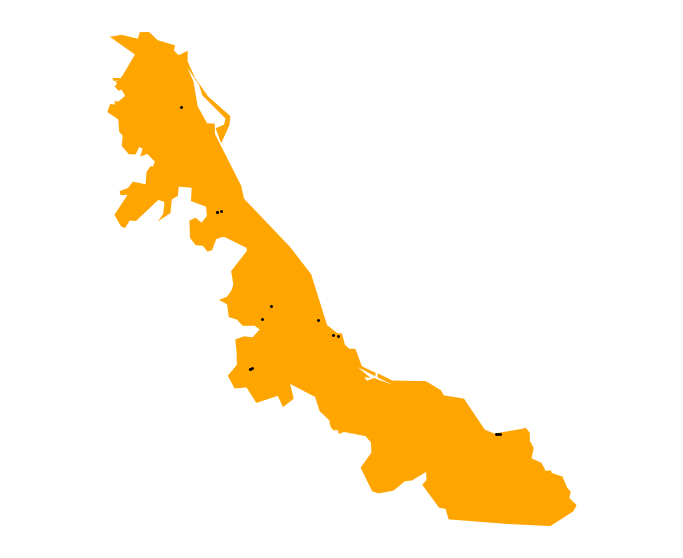

In [41]:
### Ubicación de los negocios en el mapa
fig, ax  = plt.subplots(figsize = (12,10))
EDO.plot(ax = ax,color = "orange")
net.plot(ax = ax,markersize = 3.5,color = "black")
ax.axis("off")
plt.axis('equal')
plt.show()

In [43]:
net.crs = "EPSG:4326"

eet = EDO.to_crs(epsg=3395)
gdf_proj = net.to_crs(EDO.crs)
estado_shape = cascaded_union(EDO.geometry)
coords = points_to_coords(gdf_proj.geometry)

poly_shapes, poly_to_pt_assignments = voronoi_regions_from_coords(coords, alcaldia_shape)

<ipython-input-43-ed351afb9997>:5: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  estado_shape = cascaded_union(EDO.geometry)


C:\Users\legos\anaconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\legos\anaconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


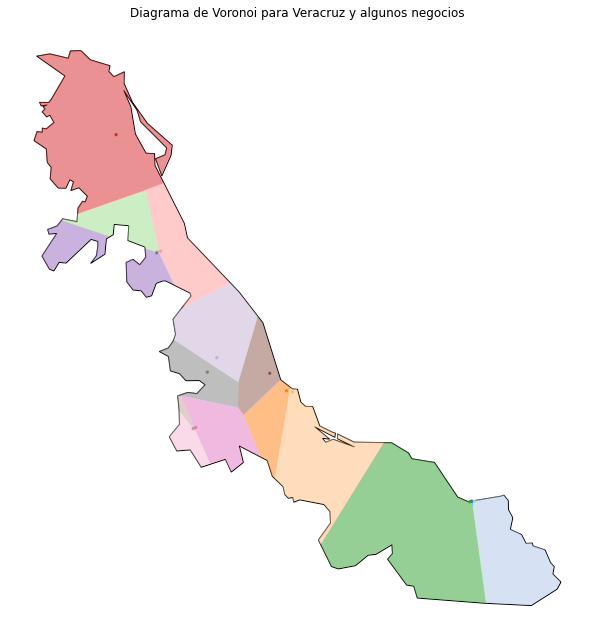

In [48]:
### El diagrama
fig, ax = subplot_for_map(figsize=(13,9))
plot_voronoi_polys_with_points_in_area(ax, estado_shape, poly_shapes, coords, poly_to_pt_assignments)
ax.set_title('Diagrama de Voronoi para Veracruz y algunos negocios')
plt.tight_layout()
plt.show()